In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizerFast
from datasets import Dataset


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
wiki_data = pd.read_json("/data/ephemeral/home/sangyeop/code/data/wikipedia_documents.json")
wiki_data = wiki_data.transpose()

In [3]:
train_path = "/data/ephemeral/home/sangyeop/code/data/train_dataset/train/dataset.arrow"
validation_path = "/data/ephemeral/home/sangyeop/code/data/train_dataset/validation/dataset.arrow"

# 데이터 로드
train_dataset = Dataset.from_file(train_path)
validation_dataset = Dataset.from_file(validation_path)
train_data = pd.DataFrame(train_dataset)
validation_data = pd.DataFrame(validation_dataset)


# Wiki data EDA

In [4]:
len(wiki_data['document_id'].unique())

60613

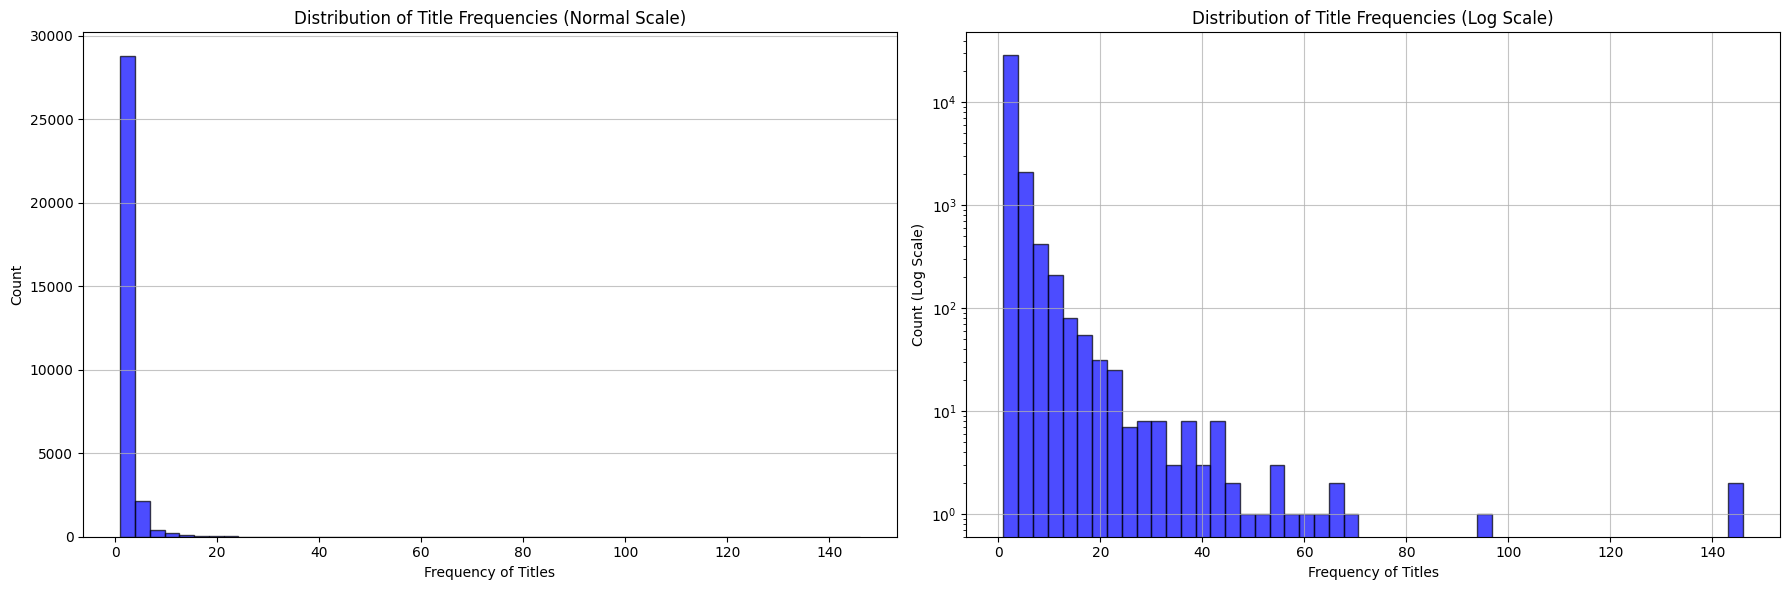

In [5]:
# 타이틀 길이 분포
unique_titles = wiki_data['title'].value_counts().reset_index()
unique_titles.columns = ['Title', 'Frequency']
frequency_distribution = unique_titles[unique_titles['Frequency'] > 0]

# 두 개의 그래프를 나란히 그리기 위해 subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# 일반 스케일 히스토그램
axes[0].hist(frequency_distribution['Frequency'], bins=50, color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Title Frequencies (Normal Scale)')
axes[0].set_xlabel('Frequency of Titles')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.75)

# 로그 스케일 히스토그램
axes[1].hist(frequency_distribution['Frequency'], bins=50, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_yscale('log')  # y축에 로그 스케일 적용
# axes[1].set_xscale('log')  # x축에 로그 스케일 적용
axes[1].set_title('Distribution of Title Frequencies (Log Scale)')
axes[1].set_xlabel('Frequency of Titles')
axes[1].set_ylabel('Count (Log Scale)')
axes[1].grid(axis='both', alpha=0.75)

# 그래프 출력
plt.tight_layout()
plt.show()

- 한 데이터가 반복적으로 나오는 경우는 드뭄

- 중복되는 title을 가진 데이터가 있긴 있지만 대부분이 별개의 title을 가짐

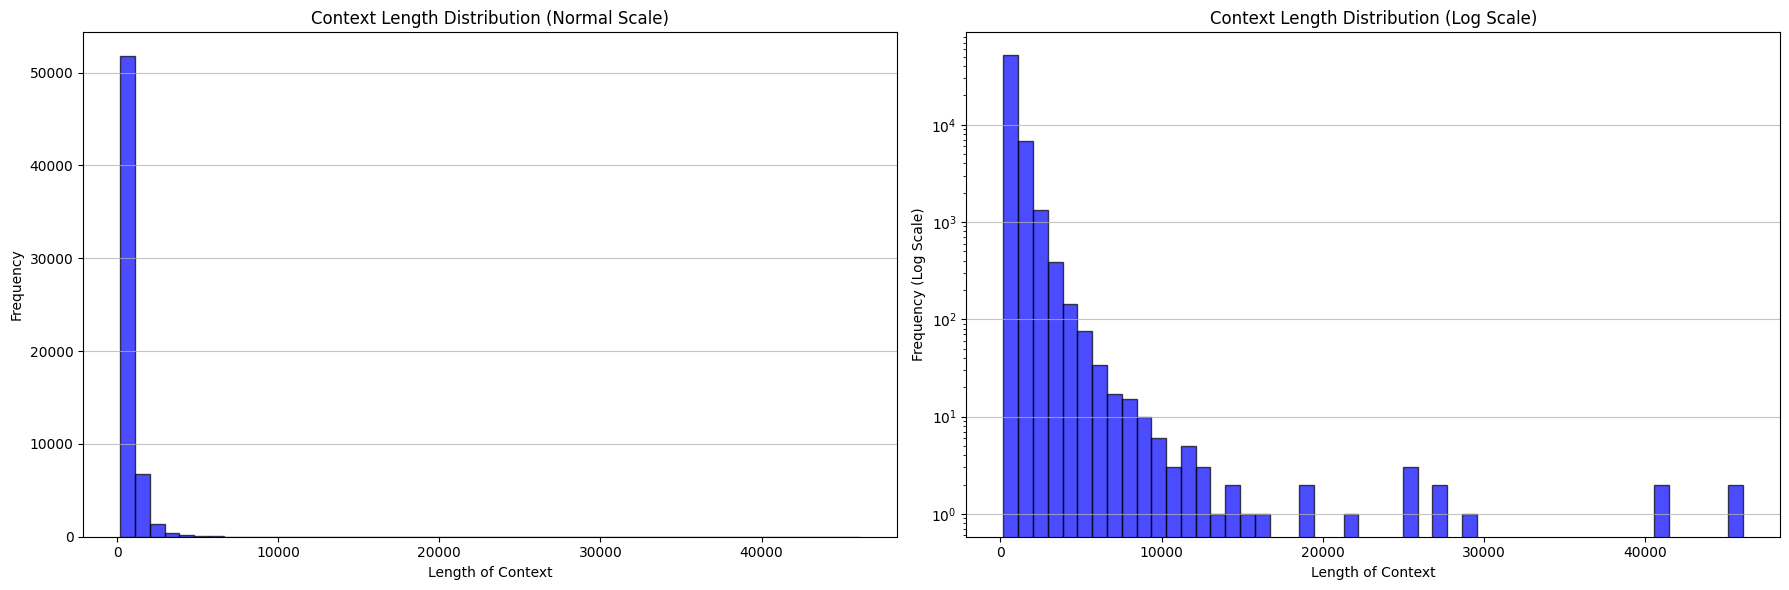

In [6]:
wiki_data['context_length'] = wiki_data['text'].apply(len)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# 일반 스케일 히스토그램
axes[0].hist(wiki_data['context_length'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Context Length Distribution (Normal Scale)')
axes[0].set_xlabel('Length of Context')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# 로그 스케일 히스토그램
axes[1].hist(wiki_data['context_length'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[1].set_yscale('log')  # y축에 로그 스케일 적용
axes[1].set_title('Context Length Distribution (Log Scale)')
axes[1].set_xlabel('Length of Context')
axes[1].set_ylabel('Frequency (Log Scale)')
axes[1].grid(axis='y', alpha=0.75)

# 그래프 간격 조정 및 출력
plt.tight_layout()
plt.show()

- 대부분 wiki 문서의 길이는 1000자 이하

In [ ]:
n_longest_number = 15
# context_length를 기준으로 내림차순 정렬하여 두 번째로 긴 문서 찾기
n_longest_context = wiki_data.nlargest(20, 'context_length').iloc[n_longest_number]
# 결과 출력
print(f"Text: {n_longest_context['text']}")
print(f"Document ID: {n_longest_context['document_id']}")
print(f"Title: {n_longest_context['title']}")
print(f"Context Length: {n_longest_context['context_length']}")

Text: ;성도(청두)시 成都市

성도,간칭으로 “융”(蓉)이라고 도 한다. 아시에서 처음으로 국제“미식의 도시”(美食之都)로 이름이 났고 고대로 부터”천부지국”(天府之国)이라는 아름다운 명칭을 얻었다.. 이백(李白)의 시편 에는 “아홉개 하늘은 성도에서 나왔고 천만개의 문은 그림으로 들어 오너라” (九天开出一成都，万户千门入画图) 진절하게 금관성(锦官城)의 부유와 수려함을 묘사 하였다. 사천의 전통극은 절기하고 풍부하며 례로 타거(托举), 개혜안(开慧眼), 얼굴 변하기(变脸), 불뿜기(喷火), 칼숨기기(藏刀)등은 사람들로 하여금 감탄을 끓이지 않 았다. 성도는 2010년 2월 28일에 “미식의 도시”로 칭호를 수여 받았다. 성도의 유명한 소식(著名小吃)은 마퍼 두부(麻婆豆腐), 쌍류 토끼 두(双流兔头), 부처폐편(夫妻肺片), 단단면(担担面), 용 초수(龙抄手), 종 물 만두(钟水饺), 한 만두 떡(韩包子), 삼대 포(三大炮), 뢰탕원(赖汤圆)등이다. 성도의 가장 좋은 여행 시간은 3월, 4월, 5월, 6월, 9월, 10월, 11월이며 청성산(青城山), 서령 설산(西岭雪山), 구룡구(九龙沟), 구봉산(九峰山), 천대산(天台山), 용지 산림공원(龙池森林公园) 등은 모두 성도의 가장 이상적인 피서 명승지이다. 성도에서 북쪽으로 올라 가다 보면 도강언(都江堰), 구채구(九寨沟)로 도달할 수 있고 서쪽의 천장 도로(川藏公路)를 따라 올라 가면 라싸(拉萨) 로 통하며 촬영 성지인 경로에는 신도교(新都桥) 해라구 빙천(海螺沟冰川), 임지(林芝) 등지 망강(芒康)에서 남쪽으로 내려가다 보면 매리설산(梅里雪山), 샹그리라(香格里亚), 려강(丽江)등 주요 여행 경치 지역이 나타 난다.

;덕양시 德阳市
덕양은 역사가 유구하고 파촉문화 발원지 중의 하나이며 여행자원은 하늘의 두터운 특혜를 가져 독특하다. 국내외 에서도 유명한 국가 중점 문화물 보호 단위(国家重点文物保护单位)이며 국가 처음으로의4A 급 풍경 명승지의 고대 촉국의 삼성퇴(三星堆)유적지; 보존이 완호하며 건축이 정밀

- 긴 문서가 질문-응답을 가지는 경우 시각화

In [8]:
print("wiki 문서의 수:",len(wiki_data['document_id'].unique()))
print("train_data이 wiki에서 가져오는 문서의 수:",len(train_data['document_id'].unique()))
print("validation_data가 wiki에서 가져오는 문서의 수:",len(validation_data['document_id'].unique()))

wiki 문서의 수: 60613
train_data이 wiki에서 가져오는 문서의 수: 3340
validation_data가 wiki에서 가져오는 문서의 수: 235


# train_data EDA

### train, validation 데이터의 context 길이 통계

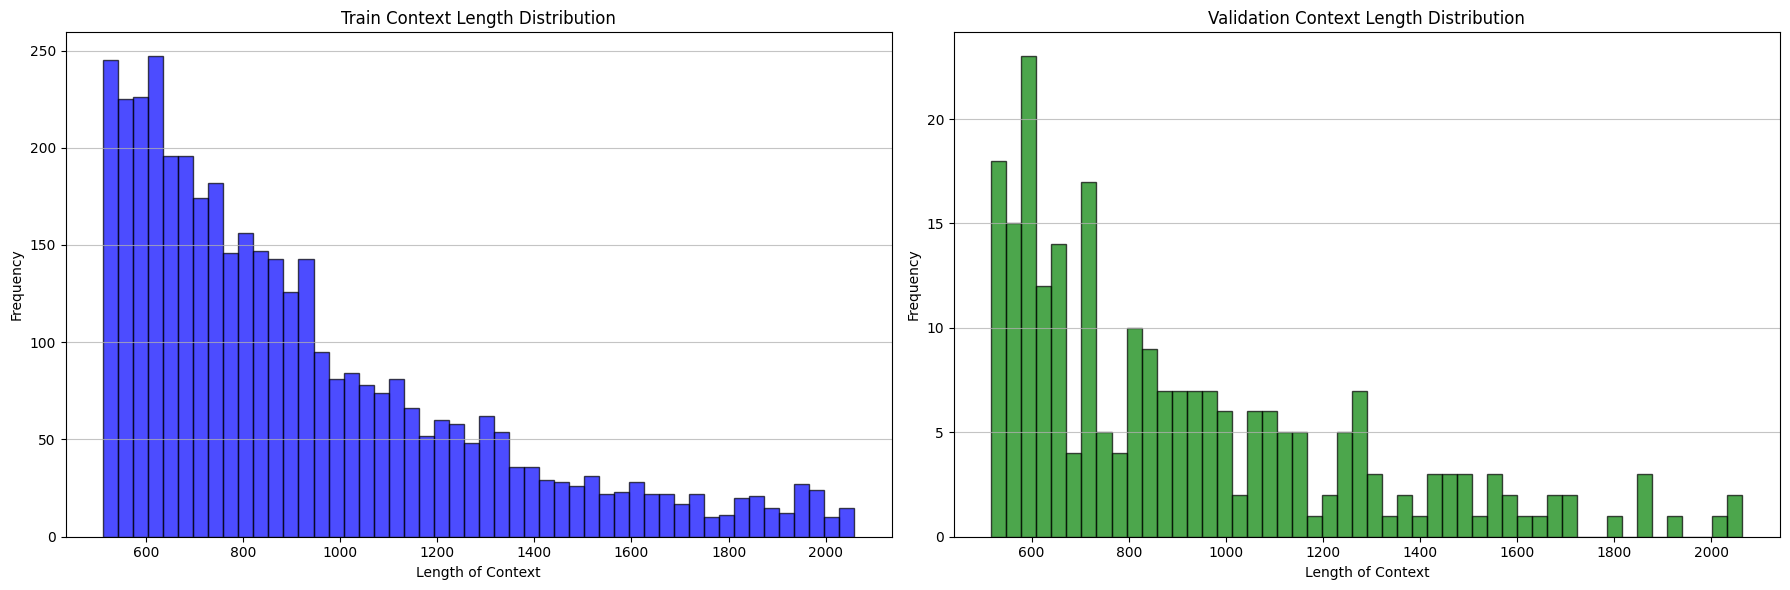

In [9]:
plt.figure(figsize=(18, 6))

# Train context 길이 분포
plt.subplot(1, 2, 1)
plt.hist(train_data['context'].apply(len), bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Train Context Length Distribution')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Validation context 길이 분포
plt.subplot(1, 2, 2)
plt.hist(validation_data['context'].apply(len), bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Validation Context Length Distribution')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

- 2000자 이상의 너무 긴 데이터는 사용되지 않음

### train, validation 데이터의 question 길이 분포

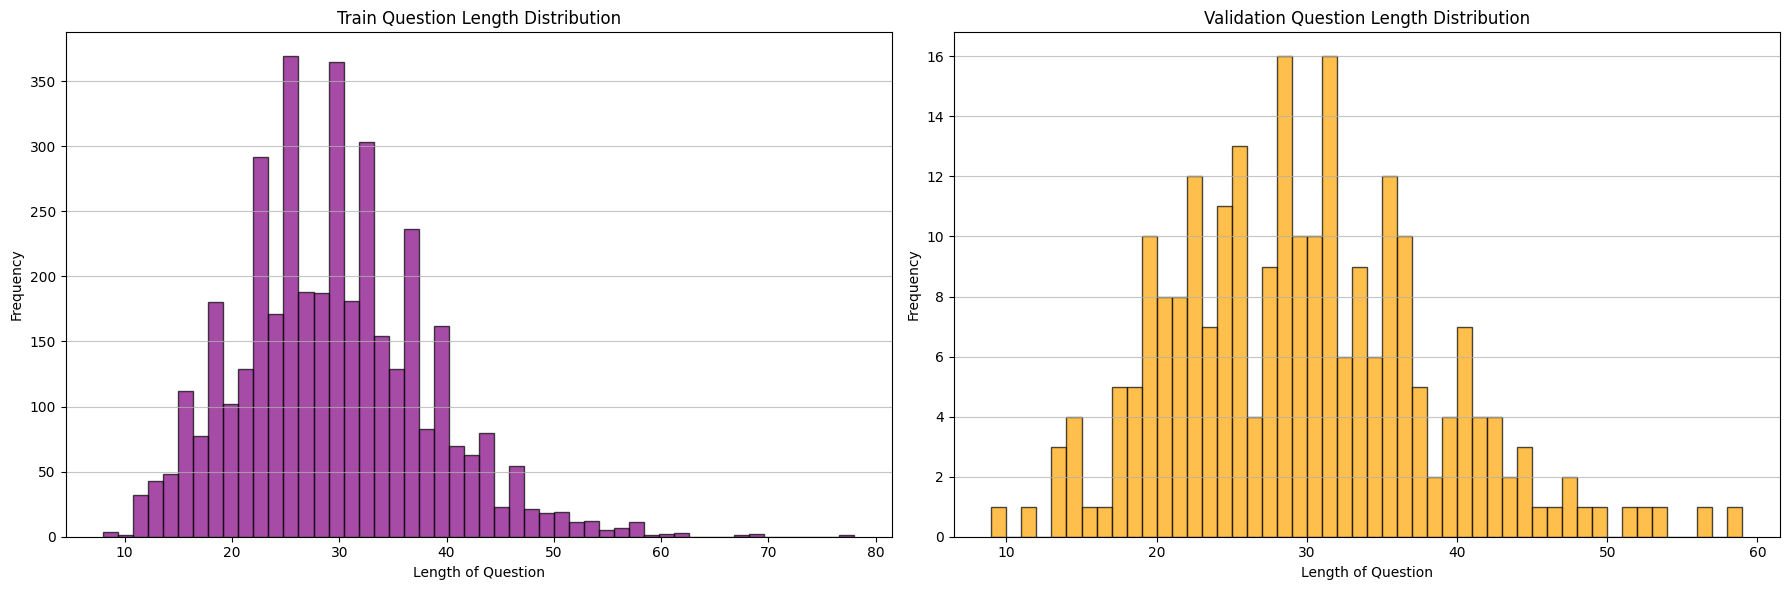

In [10]:
# 2. Question의 길이를 나타내는 그래프
plt.figure(figsize=(18, 6))

# Train question 길이 분포
plt.subplot(1, 2, 1)
plt.hist(train_data['question'].apply(len), bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title('Train Question Length Distribution')
plt.xlabel('Length of Question')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Validation question 길이 분포
plt.subplot(1, 2, 2)
plt.hist(validation_data['question'].apply(len), bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Validation Question Length Distribution')
plt.xlabel('Length of Question')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### Answer의 절대적 상대적 시작 위치 분포

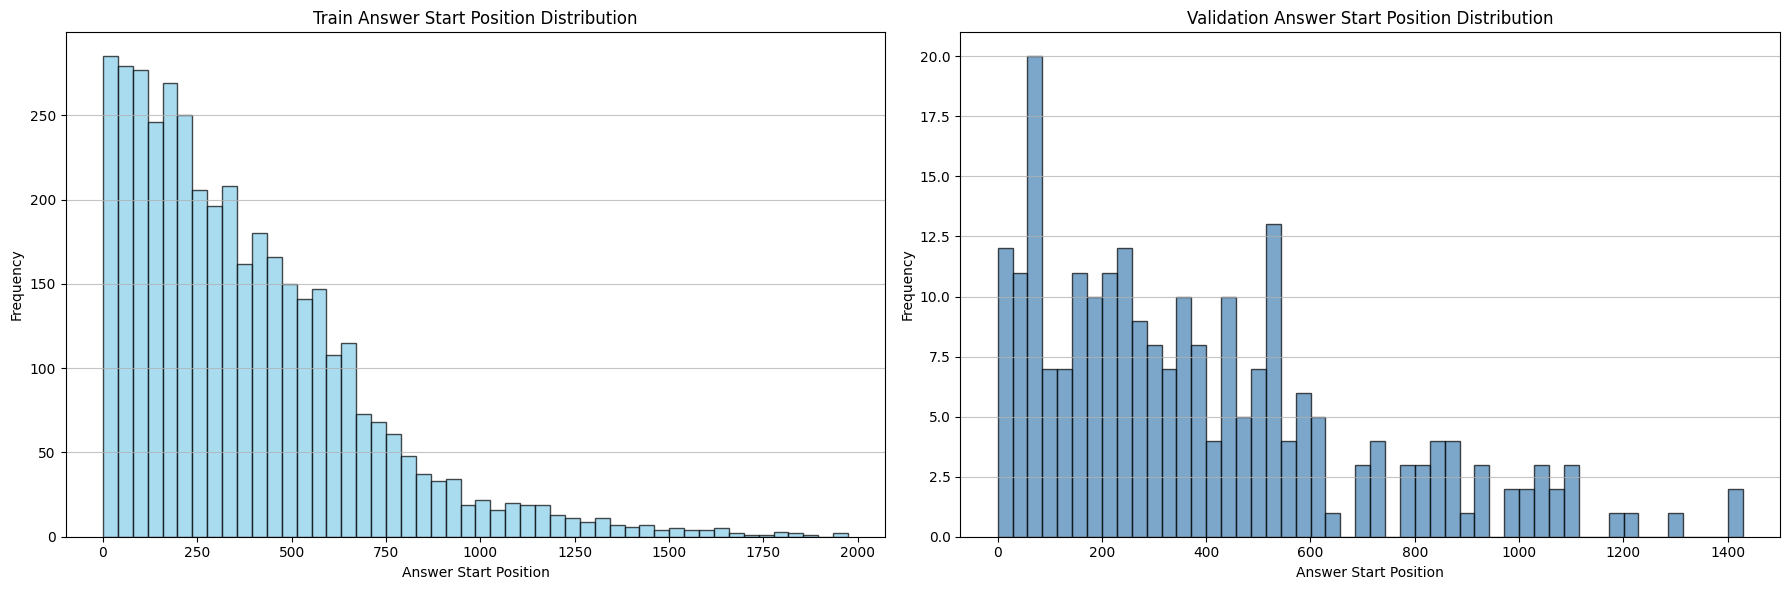

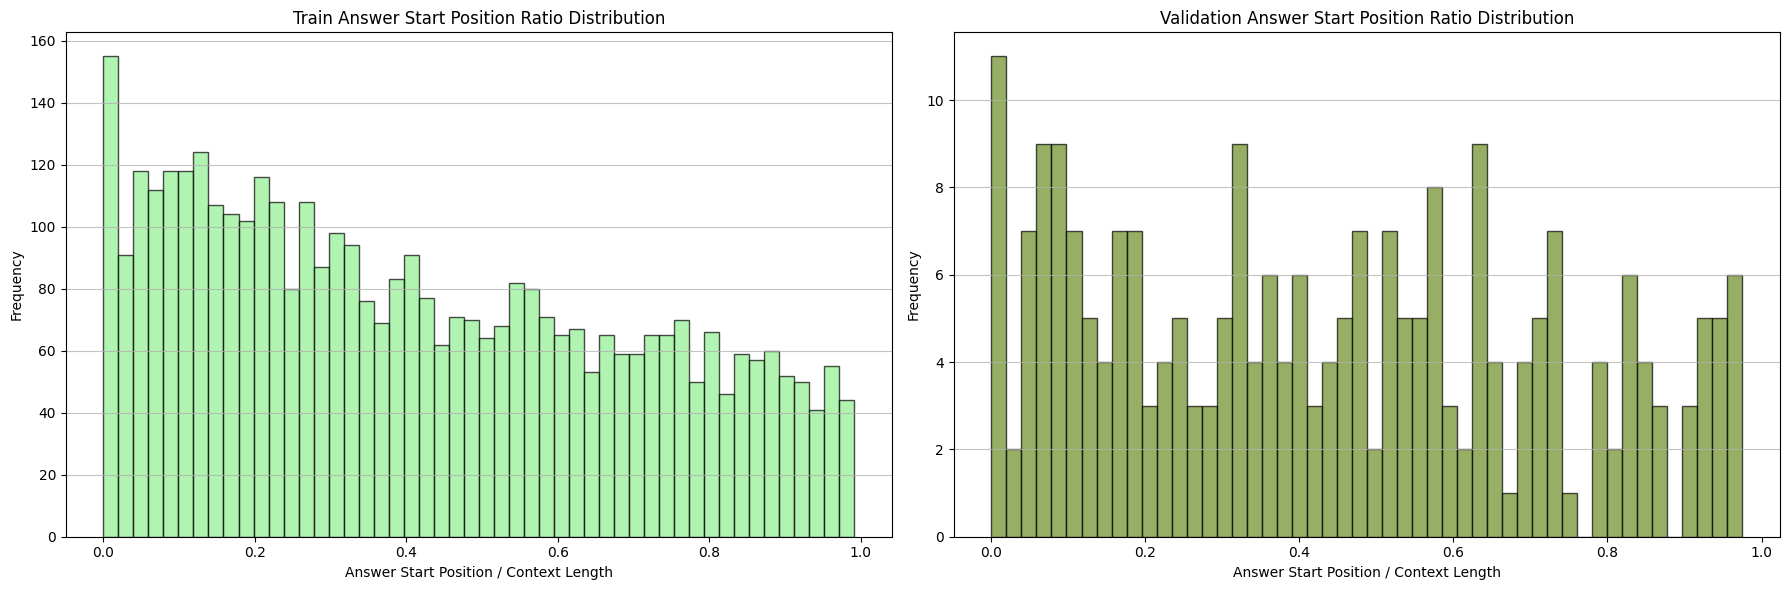

In [11]:
# 3.1 Answer의 시작 위치를 나타내는 그래프
plt.figure(figsize=(18, 6))

# Train answer 시작 위치 분포
plt.subplot(1, 2, 1)
plt.hist(train_data['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else 0), bins=50, color='#87CEEB', edgecolor='black', alpha=0.7)
plt.title('Train Answer Start Position Distribution')
plt.xlabel('Answer Start Position')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Validation answer 시작 위치 분포
plt.subplot(1, 2, 2)
plt.hist(validation_data['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else 0), bins=50, color='#4682B4', edgecolor='black', alpha=0.7)
plt.title('Validation Answer Start Position Distribution')
plt.xlabel('Answer Start Position')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()
# 3.2 Answer의 시작 위치를 context의 길이에 고려해서 나타내는 그래프 (비율)
plt.figure(figsize=(18, 6))

# Train answer 시작 위치 비율 분포
plt.subplot(1, 2, 1)
plt.hist(train_data.apply(lambda x: x['answers']['answer_start'][0] / len(x['context']) if x['answers']['answer_start'] else 0, axis=1), bins=50, color='#90EE90', edgecolor='black', alpha=0.7)
plt.title('Train Answer Start Position Ratio Distribution')
plt.xlabel('Answer Start Position / Context Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Validation answer 시작 위치 비율 분포
plt.subplot(1, 2, 2)
plt.hist(validation_data.apply(lambda x: x['answers']['answer_start'][0] / len(x['context']) if x['answers']['answer_start'] else 0, axis=1), bins=50, color='#6B8E23', edgecolor='black', alpha=0.7)
plt.title('Validation Answer Start Position Ratio Distribution')
plt.xlabel('Answer Start Position / Context Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

train data answer의 시작 위치 예시

In [12]:
# answer_start의 첫 번째 값을 추출
train_data['answer_start'] = train_data['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else None)
# 문서의 가장 초반에 위치한 데이터 추출 (answer_start / context_length 비율이 0에 가까운 데이터)
train_data['answer_position_ratio'] = train_data.apply(
    lambda x: x['answers']['answer_start'][0] / len(x['context']) if x['answers']['answer_start'] else 0, axis=1
)

# 가장 초반에 위치한 데이터 추출
earliest_answer = train_data.loc[train_data['answer_position_ratio'].idxmin()]

# 가장 끝에 위치한 데이터 추출 (answer_start / context_length 비율이 1에 가까운 데이터)
latest_answer = train_data.loc[train_data['answer_position_ratio'].idxmax()]

# 결과 출력
print("문서의 가장 초반에 위치한 데이터:")
print(f"Title: {earliest_answer['title']}")
print(f"Context: {earliest_answer['context']}")
print(f"Question: {earliest_answer['question']}")
print(f"Answer: {earliest_answer['answers']}")
print(f"Answer Start Position: {earliest_answer['answers']['answer_start'][0]}")
print(f"Context Length: {len(earliest_answer['context'])}")
print(f"Answer Position Ratio: {earliest_answer['answer_position_ratio']}")

print("\n문서의 가장 끝에 위치한 데이터:")
print(f"Title: {latest_answer['title']}")
print(f"Context: {latest_answer['context']}")
print(f"Question: {latest_answer['question']}")
print(f"Answer: {latest_answer['answers']}")
print(f"Answer Start Position: {latest_answer['answers']['answer_start'][0]}")
print(f"Context Length: {len(latest_answer['context'])}")
print(f"Answer Position Ratio: {latest_answer['answer_position_ratio']}")


문서의 가장 초반에 위치한 데이터:
Title: 하프라이프의 등장인물 목록
Context: 그리고리 신부(Father Grigori)는 게임 하프라이프 2의 레이븐홈 챕터에서 등장하는 캐릭터이다.\n\n그리고리 신부는 원래 레이븐홈의 러시아 정교회 성당의 신부로 지내고 있었다.\n\n고든이 레이븐홈에 도착했을 당시, 그는 그때도 마을 분위기에 비해 상당히 깨끗한 청남색 신부복을 입고 금빛 십자가가 달린 목걸이를 하고 있었으며 대머리에 비해 대조적으로 덥수룩한 턱수염을 가지고 있었다.\n\n평범한 광산 마을을 가장하고 반군기지로서 존재하던 레이븐홈은 어느날 반군의 주둔 사실을 알아챈 콤바인의 헤드크랩을 담은 로켓의 폭격을 받아 그리고리 신부를 제외한 모든 사람이 헤드크랩에 물려 좀비가 되어 마을 안을 배회하게 되었다. 목숨을 부지한 그리고리 신부는 살아남기 위해 레이븐홈을 전전하며 좀비들을 '구원하기' 위한 수많은 인공 함정을 만들어놓고 그들을 레이븐홈 내에서 소탕하기 위해 계속해서 싸운다.\n\n그러던 와중 콤바인의 습격으로 인해 블랙 메사 동부에서 도망쳐왔던 고든 프리맨과 만나게 되고, 좀비와 헤드크랩을 쏴죽이거나 좀비를 상대로 강력한 위력을 발휘하는 산탄총을 던져주는 등, 여러 도움을 주며\n고든이 끝까지 헤쳐나와 자신의 성당으로 오도록 유도한 후에 공동묘지에서 고든과 함께 윈체스터 장총으로 좀비들을 소탕하며 레이븐홈의 밖으로 나가는 곳으로 인도해준다.\n\n그를 볼 수 있는 마지막 장소인 광산 출구에서, 그는 불길 너머로 모여 드는 좀비들을 구원하며 광소(狂笑)와 함께 종적을 감춘다. 에피소드 1의 요새 붕괴로 인하여 17번 지구와 그 외곽이 방사능에 뒤덮임에 따라 그리고리 신부는 죽었을 것이라는 추측이 있지만 확실치는 않다.\n\n그리고 신부가 산탄총을 줄 때, 치트로 날아가면 신부의 총 에나벨을 얻을 수 있다.
Question: 고든 프리맨이 레이븐홈을 떠날 수 있도록 도와준 사람은?
Answer: {'answer_start': [0], 'text':

validation data answer의 시작 위치 예시

In [13]:
# answer_start의 첫 번째 값을 추출
validation_data['answer_start'] = validation_data['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else None)
# 문서의 가장 초반에 위치한 데이터 추출 (answer_start / context_length 비율이 0에 가까운 데이터)
validation_data['answer_position_ratio'] = validation_data.apply(
    lambda x: x['answers']['answer_start'][0] / len(x['context']) if x['answers']['answer_start'] else 0, axis=1
)

# 가장 초반에 위치한 데이터 추출
earliest_answer = validation_data.loc[validation_data['answer_position_ratio'].idxmin()]

# 가장 끝에 위치한 데이터 추출 (answer_start / context_length 비율이 1에 가까운 데이터)
latest_answer = validation_data.loc[validation_data['answer_position_ratio'].idxmax()]

# 결과 출력
print("문서의 가장 초반에 위치한 데이터:")
print(f"Title: {earliest_answer['title']}")
print(f"Context: {earliest_answer['context']}")
print(f"Question: {earliest_answer['question']}")
print(f"Answer: {earliest_answer['answers']}")
print(f"Answer Start Position: {earliest_answer['answers']['answer_start'][0]}")
print(f"Context Length: {len(earliest_answer['context'])}")
print(f"Answer Position Ratio: {earliest_answer['answer_position_ratio']}")

print("\n문서의 가장 끝에 위치한 데이터:")
print(f"Title: {latest_answer['title']}")
print(f"Context: {latest_answer['context']}")
print(f"Question: {latest_answer['question']}")
print(f"Answer: {latest_answer['answers']}")
print(f"Answer Start Position: {latest_answer['answers']['answer_start'][0]}")
print(f"Context Length: {len(latest_answer['context'])}")
print(f"Answer Position Ratio: {latest_answer['answer_position_ratio']}")


문서의 가장 초반에 위치한 데이터:
Title: 1965년 캐나다 연방 선거
Context: 1965년 캐나다 연방 선거는 캐나다에서 27번째로 치러진 연방 선거로, 캐나다 하원의원 265석을 선출하기 위해 1965년 11월 8일 진행되었다. 총 유효표는 7,713,238표가 나왔으며, 투표율은 저번 선거 대비 4%P가 떨어진 75%를 기록했다.\n\n1963년 선거로 정권을 잡게 된 레스터 B. 피어슨의 자유당은 과반수를 확보하지 못해 국정 운영에 어려움을 겪었다. 이에 피어슨은 선거가 치러진 지 2년 만에 다시 의회를 해산하고 조기 총선을 감행하였다. 선거 과정에서 자유당과 진보보수당은 모두 복지 확대를 주장하였다. 한편 사회신용당은 퀘벡 지역을 중심으로 한 세력이 당을 이탈해 신용연합을 창당하면서 두 세력으로 분열되었다.\n\n선거 결과 자유당은 의석수를 늘리기는 하였지만 과반수에는 모자란 131석을 확보하는 데 그쳤다. 진보보수당 역시 의석수를 늘리는 데는 성공했지만 정권 재교체에는 실패하였다. 선거 결과의 부진에 따라 자유당의 피어슨과 진보보수당의 디펜베이커 모두 대표직에서 물러나게 되었다. 신민주당은 의석수를 조금 늘리는 데 그쳤지만 자유당이 과반수를 확보하지 못함에 따라 캐스팅보트를 쥐게 되었다. 한편 사회신용당은 신용연합보다 못한 결과를 얻게 됨에 따라 의회 내 주도권을 상실하게 되었다.
Question: 피어슨이 다시 의회를 해산했던 년도는?
Answer: {'answer_start': [0], 'text': ['1965년']}
Answer Start Position: 0
Context Length: 630
Answer Position Ratio: 0.0

문서의 가장 끝에 위치한 데이터:
Title: 지평좌표계
Context: 지평 좌표(地平座標)는 천체 관측에서 가장 기본이 되는 좌표 체계로, 지평선이 기준선, 남점(南點) 또는 북점(北點)이 기준점이 되는데, 현재는 북점을 더 많이 사용하고 있다.\n\n지평 좌표계에서는 천체의 위치를 고도

In [14]:
def get_tokenizer():
    tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")
    return tokenizer

tokenizer = get_tokenizer()

# 토큰 ID 추출을 위한 함수
def get_token_id_count(context):
    encoding = tokenizer(context, return_offsets_mapping=True, add_special_tokens=False)
    token_ids = encoding['input_ids']
    return token_ids.count(1)  # token_id가 1인 경우의 개수 반환

# 데이터셋에 token_id가 1인 개수 추가
train_data['token_id_1_count'] = train_data['context'].apply(get_token_id_count)

# token_id가 1인 개수가 많은 상위 10개 데이터 추출
top_10 = train_data.nlargest(30, 'token_id_1_count')

# 결과 출력
top_10[['title', 'context', 'token_id_1_count']]


Token indices sequence length is longer than the specified maximum sequence length for this model (1020 > 512). Running this sequence through the model will result in indexing errors


,title,context,token_id_1_count
1018,상대성이론,일반 상대성 이론\n\n일반 상대성 이론은 1915년에 아인슈타인이 발표하였다. (...,40
1145,윤치호,민족자결주의\n1916년 조선총독부는 여러 번 사람을 보내 그에게 당국 시책에 협조...,40
1318,윤치호,민족자결주의\n1916년 조선총독부는 여러 번 사람을 보내 그에게 당국 시책에 협조...,40
1830,반토,무가의 반토는 에도 막부에서 오반의 지휘관으로 평시엔 에도성 · 오사카성 · 니조성...,40
2211,반토,무가의 반토는 에도 막부에서 오반의 지휘관으로 평시엔 에도성 · 오사카성 · 니조성...,40
3805,상대성이론,일반 상대성 이론\n\n일반 상대성 이론은 1915년에 아인슈타인이 발표하였다. (...,40
3795,프레시 프리큐어!,;뫼비우스(メビウス)\n:성우 - 니시무라 토모미치 / 심정민\n: 라비린스를 다스...,38
3886,유희왕 GX,;사메지마 교장(사민준)\n:성우 : 이와사키 마사미\n:한국판 성우 : 고성일\n...,37
119,포켓몬스터의 등장인물 목록 (애니메이션),;강석\n*등장 시기: DP\n*성우: 오인성\n:무쇠시티 체육관 관장이며 운하시티...,35
1980,전주시의 역사,이규보는 신종 2년(1199) ~ 신종 3년(1200)까지 전주로 부임한 이야기를 ...,35


In [15]:
from IPython.display import display, HTML

In [16]:
UNK_token_idx=1018
display(HTML(train_data.iloc[UNK_token_idx]['context']))

In [17]:
train_titles = set(train_data['title'])
wiki_titles = set(wiki_data['title'])
validation_titles = set(validation_data['title'])
# 겹치는 title 찾기
common_titles = train_titles.intersection(wiki_titles)
common_titles_val = validation_titles.intersection(wiki_titles)
# 결과 출력
common_titles_list = list(common_titles)
common_titles_list_val = list(common_titles_val)

print(f"wiki와 train data의 겹치는 title의 수: {len(common_titles_list)}")
print(f"wiki와 validation data의 겹치는 title의 수: {len(common_titles_list_val)}")

wiki와 train data의 겹치는 title의 수: 2701
wiki와 validation data의 겹치는 title의 수: 226


In [18]:
print(len(train_data['title']))
print(len(train_titles))
print("중복되는 title의 수: ",len(train_data['title'])-len(train_titles))

3952
2716
중복되는 title의 수:  1236


- train data의 unique한 타이틀 수: 2716
- wiki와 train data의 겹치는 title의 수: 2701
- **15개는 wiki에는 없지만 train data에 있는 문서라는 뜻**

### wiki 문서에는 없지만 train data에는 있는 문서

In [19]:
train_titles_not_in_wiki = train_titles - wiki_titles

# train 데이터에서 wiki에 없는 title에 해당하는 행을 추출
train_data_not_in_wiki = train_data[train_data['title'].isin(train_titles_not_in_wiki)]

# title과 context를 출력할 수 있도록 DataFrame으로 생성
train_data_not_in_wiki_info = train_data_not_in_wiki[['title', 'context']]
train_data_not_in_wiki_info

,title,context
291,고레인저,"수수께끼의 UFO들과 유럽에서 가면 라이더 V3과 싸우던 철면 군단, 사하라 사막에..."
389,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, ..."
477,와그너,1929년 후순 대공황의 습격과 함께 와그너는 평범한 시민과 근로자에게 경제적 구호...
536,케네디,케네디는 1962년 11월 7일 테드 케네디는 연방 상원으로 선서되었다. 그는 그가...
806,하워드 마셜,그는 구두로는 안나 니콜 스미스에게 자신의 재산의 반을 주겠다고 약속했다 하나 유언...
902,톰킨스,톰킨스는 자신이 뉴욕주 헌법 회의로 대표로 만들어졌을 때 자신의 정치 경력을 시작하...
962,헨드릭스,항상 야망적이었던 헨드릭스는 정치에 뛰어들었다. 그는 1848년 인디애나주 연방 하...
1025,댈러스,1839년 귀국 후 댈러스는 제임스 뷰캐넌이 거부한 후 법무장관 직이 제공되었으나 ...
1449,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, ..."
1538,제발트,제발트의 문학 작업은 실질적으로 1980년대 말부터 시작되었다. 독일 사람들은 19...


In [20]:
validation_titles_not_in_wiki = validation_titles - wiki_titles

# validation 데이터에서 wiki에 없는 title에 해당하는 행을 추출
validation_data_not_in_wiki = validation_data[validation_data['title'].isin(validation_titles_not_in_wiki)]

# title과 context를 출력할 수 있도록 DataFrame으로 생성
validation_data_not_in_wiki_info = validation_data_not_in_wiki[['title', 'context']]
validation_data_not_in_wiki_info

,title,context
87,와그너,"제2차 세계 대전 후에 와그너는 노동, 사회 보장, 완전 고용 (취업 기회들이 풍부..."
105,댈러스,1839년 귀국 후 댈러스는 제임스 뷰캐넌이 거부한 후 법무장관 직이 제공되었으나 ...


In [21]:
# 특정 title을 가진 데이터 추출
title_to_find = "고레인저"

wiki_specific = wiki_data[wiki_data['title'] == title_to_find]
train_specific = train_data[train_data['title'] == title_to_find]
validation_specific = validation_data[validation_data['title']==title_to_find]
# 결과 출력 
wiki_specific

,text,corpus_source,url,domain,title,author,html,document_id,context_length


In [22]:
train_specific

,title,context,question,id,answers,document_id,__index_level_0__,answer_start,answer_position_ratio,token_id_1_count
291,고레인저,"수수께끼의 UFO들과 유럽에서 가면 라이더 V3과 싸우던 철면 군단, 사하라 사막에...",키카이다와 권투사 군단이 결투를 벌였던 장소는?,mrc-0-000099,"{'answer_start': [66], 'text': ['몽골']}",45631,63,66,0.071817,8


In [23]:
validation_specific

,title,context,question,id,answers,document_id,__index_level_0__,answer_start,answer_position_ratio


In [24]:
wiki_data.iloc[45631]

text              수수께끼의 UFO들과 유럽에서 가면 라이더 V3과 싸우던 철면 군단, 사하라 사막에...
corpus_source                                                 위키피디아
url                                                            None
domain                                                         None
title                                               재커 전격대 vs. 고레인저
author                                                         None
html                                                           None
document_id                                                   45631
context_length                                                  919
Name: 45631, dtype: object

**title의 라벨링이 잘못되어 있는 거 였음**(validation도 마찬가지)

In [29]:
display(HTML(train_data['context'][4]))